# 03.파이썬라이브러리-Matplotlib

## matplotlib 설치하기

In [ ]:
!pip install matplotlib    # 최초 한번만 실행하기

### matplotlib 버전 확인 

In [1]:
import matplotlib 

matplotlib.__version__

'3.4.2'

-----------

## matplotlib 사용 예:
- https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png 
- https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

### 1. 단일 그래프 표현

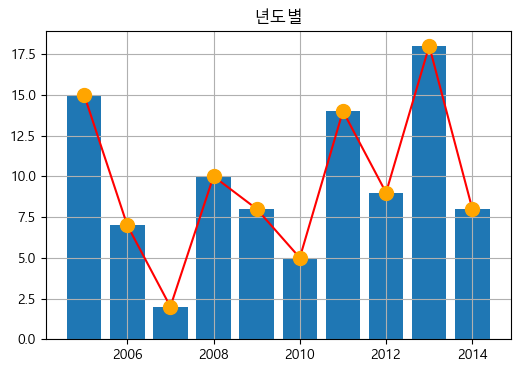

In [24]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 4)  # (가로,세로) 인치 단위

# X축, Y축 데이터
X = list(range(2005,2015,1))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.bar(X, Y, zorder=1)      # 막대 그래프
plt.plot(X, Y, c='r', zorder=2)     # 선 그래프
plt.scatter(X, Y, s=100, c='orange', zorder=3)  # 점 그래프
plt.grid(True)
plt.title('년도별')             # 그래프 제목 

plt.style.use('seaborn')        # 그래프 스타일, default(default), dark_background, seaborn-whitgrid, Solarize_Light2

plt.savefig('graph/basic.png')  # 그래프 저장하기

plt.show()  # 그래프 나타내기

### 2. 하나의 그래프에 여러 개 서브그래프 표현
- colormap : default(viridis) min:보라, max:노랑
- https://matplotlib.org/tutorials/colors/colormaps.html

Figure(640x480) [[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


<Figure size 1000x600 with 0 Axes>

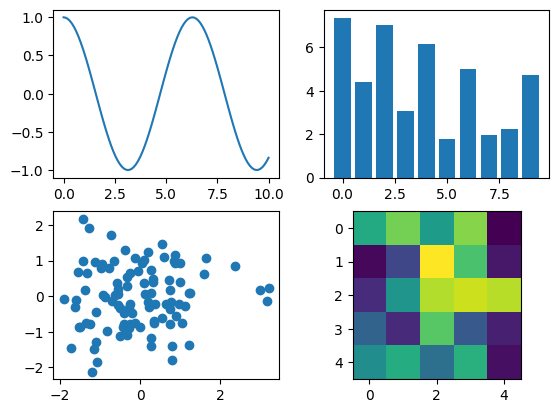

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 크기 설정
# plt.rcParams['figure.figsize'] = (10, 6)  # (가로,세로) 인치 단위
plt.figure(figsize=(10, 6))     # (10,6) 인치 그래프

# 그래프 공간 설정
fig, ax = plt.subplots(2,2)      # 2행 2열 그래프 공간
print(fig, ax)

plt.style.use('default') 

# 선 그래프
X = np.linspace(0, 10, 100)      # 0~10사이의 선형 분포 100개 
Y = np.cos(X)                    # X의 코사인 값
ax[0,0].plot(X, Y)               # 선 그래프

# 막대 그래프
X = np.arange(10)                # 0~9사이의 연속값
Y = np.random.uniform(1,10,10)   # 균일분포값 생성
ax[0,1].bar(X, Y)                # 막대 그래프

# 점 그래프
X = np.random.randn(100)         # 정규 분포를 가지는 데이터
Y = np.random.randn(100)         # 정규 분포를 가지는 데이터
ax[1,0].scatter(X, Y)

# 분포를 2D 이미지 그림으로
Z = np.random.uniform(0,1,(5,5)) # 0~1사이의 균일분포값을 5행x5열
ax[1,1].imshow(Z)                # 2D 이미지 그림으로 표현

plt.show()

### 3.파일 데이터 읽어서 그래프로 데이터 분석하기
- 머신러닝 학습 용 데이터 : 1978년 보스턴 집값 데이터
- feature: 독립변수(범죄율, 강인접여부, 일산화질소, 방개수, 학생/교사비율, 흑인의 비율)
- target: 종속변수(주택가격) 간의 관계를 그래프로 시각화하여 분석해 본다.
- 변수 정보
> 1. 자치시별 1인당 범죄율(CRIM)
> 2. 강인접여부(CHAS) - 1:예, 0:아니오 
> 3. 10ppm 당 농축 일산화질소(NOX)
> 4. 방개수(RM)  
> 5. 학생/교사비율(PTRATIO)
> 6. 자치시(town)별 흑인의 비율(B)
> 7. 주택가격(MEDV) 

#### -변수들 그래프로 나타내기

14 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


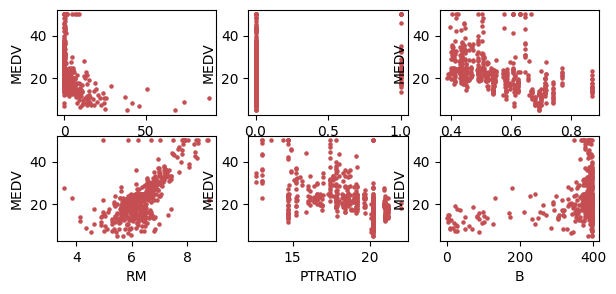

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.데이터 불러오기
df = pd.read_csv('data/HousingData.csv') 
print(len(df.columns), df.columns)
#df

# 2.독립변수와 종속변수 간 그래프로 나타내기
cols = ['CRIM','CHAS','NOX','RM','PTRATIO','B'] # 독립변수
plt.figure(figsize=(7, 3))   # 그래프 크기
p = 1
for col in cols:
    plt.subplot(2,3,p)   # 2 x 5 행렬로 이뤄진 하위 그래프에서 p에 따라 위치를 지정
    plt.scatter(df[col],df['MEDV'],color ='r', s=5)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    p += 1
plt.show()

#### - 변수들 간의 상관관계 분석(Correlation analysis)하기

- 상관관계 분석:  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법이다
- 상관 계수Correlation coefficient): 상관관계의 정도를 파악하는 두 변수간의 연관된 정도를 나타냄
- 피어슨 상관 계수는 코시-슈바르츠 부등식에 의해 +1과 -1 사이의 값을 가지며
> - +1은 완벽한 양의 선형 상관 관계, 
> - 0은 선형 상관 관계 없음, 
> - -1은 완벽한 음의 선형 상관 관계

상관계수:              CRIM      CHAS       NOX        RM   PTRATIO         B
CRIM     1.000000 -0.054355  0.417130 -0.219150  0.281110 -0.381411
CHAS    -0.054355  1.000000  0.075097  0.104885 -0.111304  0.051264
NOX      0.417130  0.075097  1.000000 -0.302188  0.188933 -0.380051
RM      -0.219150  0.104885 -0.302188  1.000000 -0.355501  0.128069
PTRATIO  0.281110 -0.111304  0.188933 -0.355501  1.000000 -0.177383
B       -0.381411  0.051264 -0.380051  0.128069 -0.177383  1.000000


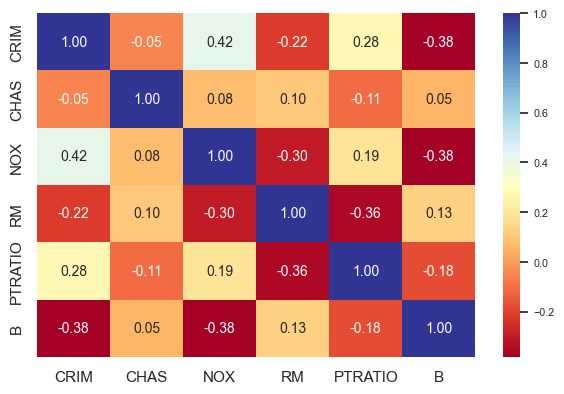

In [62]:
# 3.변수간 상관관계 그래프로 나타내기
corr = df[cols].corr(method='pearson')
print(f'상관계수: {corr}')

#상관계수를 Heatmap으로 표현 
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

                     
import seaborn as sns

sns.set(font_scale=0.7)  # heatmap안의 font-size

heatmap = sns.heatmap(corr.values, annot=True, fmt='.2f',annot_kws={'size':10},
                     yticklabels=cols, xticklabels=cols, ax=ax, cmap='RdYlBu')
plt.tight_layout()
plt.show()

-------

## 1. Matplotlib 기본 설정
- **한글 폰트** 사용 : 전체 사용 설정, 특정 부분사용 설정
- **그래프 크기** 설정 : 
- **그래프 스타일** 설정 : plt.style.use(style-name)  


###  한글 폰트 사용

In [43]:
import matplotlib as mpl

# 현재 전체 폰트 조회
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

# 전체 사용 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['font.size'] = 15

['sans-serif']
10.0


In [44]:
import matplotlib.pyplot as plt

# 현재 전체 폰트 조회
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

# 전체 사용 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15

['Malgun Gothic']
15.0


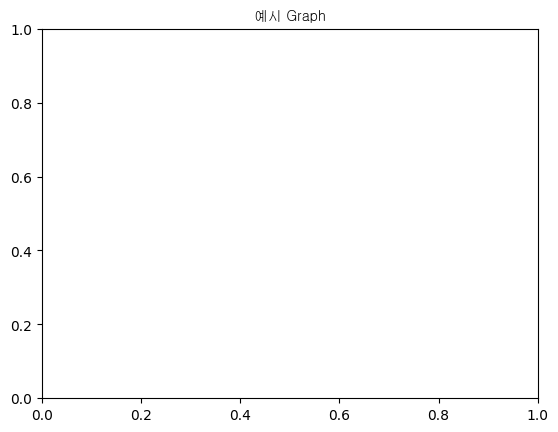

In [97]:
# 특정 부분 사용 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:\Windows\Fonts\gulim.ttc'
fontprop = fm.FontProperties(fname=path)
plt.title('예시 Graph', fontproperties=fontprop)
plt.show()

### 그래프 크기 설정

#### - 전체 적용

In [49]:
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시
plt.rcParams['figure.figsize'] = (6, 4)  # (가로,세로) 인치 단위
# fig = plt.figure(figsize=(6,4))

plt.rcParams['lines.linewidth'] = 2   # 선 두께
plt.rcParams['lines.color'] = 'r'     # 선 색깔
plt.rcParams['axes.grid'] = True      # 차트 내 격자 표시

#### - 부분 적용

In [ ]:
plt.figure(figsize=(6,4))

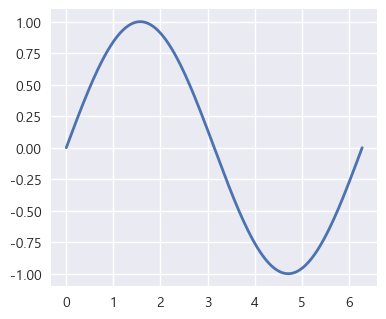

In [50]:
import numpy as np

X = np.linspace(0, 2*np.pi, 200)
Y = np.sin(X)
plt.figure(figsize=(4.2, 3.6))
plt.plot(X, Y)
plt.show()

###  그래프 스타일 설정

#### - 그래프 배경 스타일 설정
- plt.style.use(style-name)
- 예: plt.style.use('seaborn')
> - default, classic, grayscale ggplot, seaborn, dark_background  
> - fast, bmh, Solarize_Light2, seaborn-notebook, seaborn-whitegrid

In [62]:
plt.style.use('default')
# plt.style.use('dark_background')

#### - 그리드 설정

In [ ]:
plt.grid()

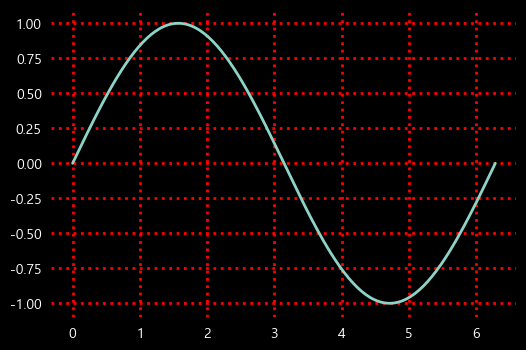

In [59]:
plt.figure(figsize=(6, 4))
plt.plot(X, Y)
plt.grid(color='r', linestyle='dotted', linewidth=2)
# plt.grid(axis='x', color='r', linestyle='dotted', linewidth=2)
# plt.grid(axis='y', color='r', linestyle='dotted', linewidth=2)
plt.show()

### Matplotlib 기본 참고 사이트

#### - 그래프 예제
- https://matplotlib.org/stable/gallery/index.html
    
#### - Linestyles(선 스타일과 소스 코드 포함)
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html?highlight=linestyle 

#### - Colors(튜토리얼 및 예시와 소스 코드 포함
- https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py 

#### - matplotlib.markers(마커와 소스 코드 포함)
- https://matplotlib.org/stable/api/markers_api.html?highlight=marker#module-matplotlib.markers 

#### - Colormap(컬러맵) 
- https://matplotlib.org/tutorials/colors/colormaps.html 

----------

## 2. 기본 그래프
- https://matplotlib.org/stable/api/pyplot_summary.html?highlight=pyplot%20style%20use%20style%20name 


### 선(plot)그래프 나타내기
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
- **matplotlib.pyplot.plot**(*args, scalex=True, scaley=True, data=None, **kwargs)

['Malgun Gothic']
10.0


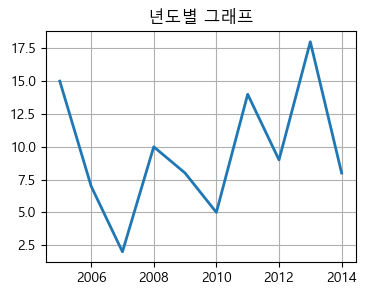

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# 현재 전체 폰트 조회
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (4, 3) # 그래프(figure)의 크기, (가로,세로) 인치 단위
plt.rcParams['lines.linewidth'] = 2      # 선 두께
plt.rcParams['axes.grid'] = True 

#plt.style.use('default')

columns = list(range(2005,2015,1))
data    = [[15,7,2,10,8,5,14,9,18,8]]  
index   = ['횟수']

df = pd.DataFrame(data, columns=columns, index=index)
df.columns.name = '연도'

x = df.columns    #x = df.columns
y = df.values[0]  #y = df.values[0]

plt.plot(x, y)
#plt.plot(x, y, 'o', linestyle='dashed', c='b')
plt.title('년도별 그래프')
plt.show()

### [실습] : 2개 선그래프 나타내기

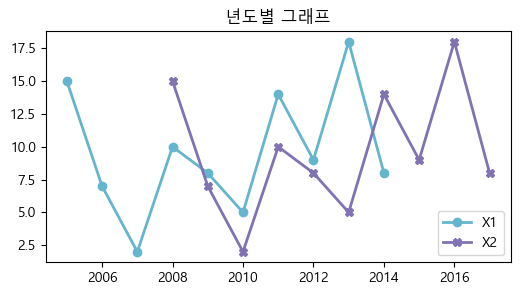

In [108]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3)  # (가로,세로) 인치 단위

# X축, Y축 데이터
X1 = list(range(2005,2015,1))
X2 = list(range(2008,2018,1))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.plot(X1, Y, 'o', linestyle='solid', c='c', label='X1')     #선 그래프
plt.plot(X2, Y, 'X', linestyle='solid', c='m', label='X2')     #선 그래프
plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.show()

### 선 그래프 : numpy 데이터

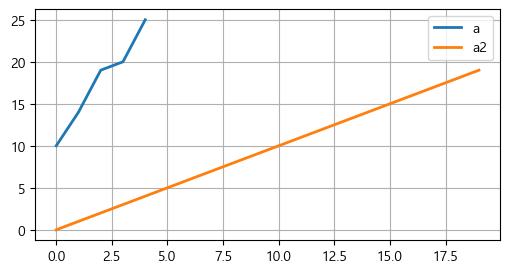

In [111]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([10,14,19,20,25])
plt.plot(a, label='a')

a2 = np.arange(20)
plt.plot(a2, label='a2')

plt.legend()
plt.show() 

### 2차 방정식의 그래프 : f(x) = a*x^2 + b, 포물선 방정식

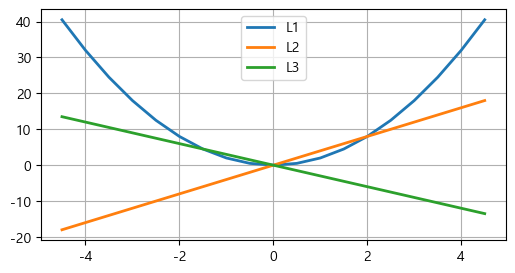

In [113]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-4.5,5,0.5)
y = 2*x**2
plt.plot(x, y, label='L1')
plt.plot(x, 4*x, label='L2')
plt.plot(x,-3*x, label='L3')
plt.legend()
plt.show()

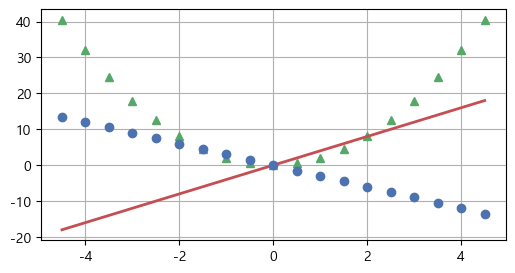

In [121]:
x = np.arange(-4.5,5,0.5)
y1 = 2*x**2
y2 = 4*x
y3 = -3*x
plt.plot(x, y1, 'g^', x, y2, 'r-', x, y3, 'bo')
plt.show()

--------

### 점(scatter) 그래프 나타내기
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- **matplotlib.pyplot.scatter**(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)[source]

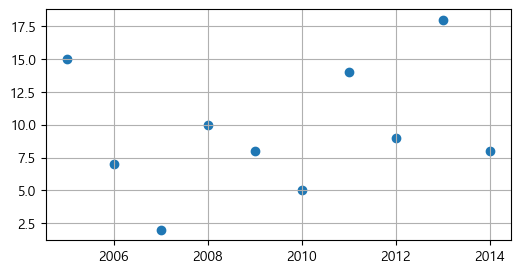

In [122]:
import matplotlib.pyplot as plt

x = list(range(2005,2015,1))
y  = [15,7,2,10,8,5,14,9,18,8]

plt.scatter(x, y)
plt.show()

#### - 점 크기 지정

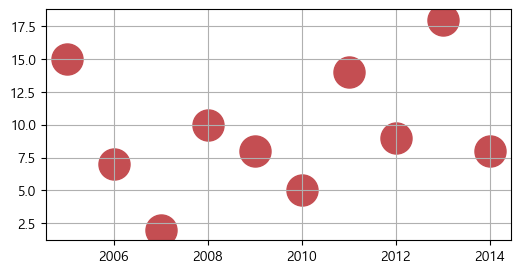

In [124]:
plt.scatter(x, y,  s=500, c='r')  # s:마커크기: 500, 컬러:red 
# for x, y in zip(X, Y):     
#     plt.text(x, y, str(y), fontsize=10, 
#              horizontalalignment='center', verticalalignment='center')  # x,y좌표에 글자 넣기
plt.show()

#### - 점 크기, 색상, 투명도 지정

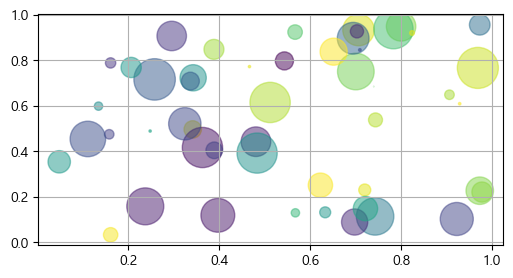

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

#### - Hyperlink 적용된 이미지로 표현하기
- https://matplotlib.org/stable/gallery/misc/hyperlinks_sgskip.html#sphx-glr-gallery-misc-hyperlinks-sgskip-py

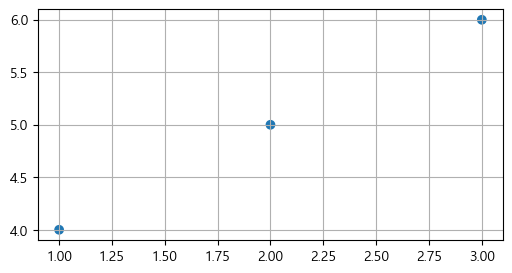

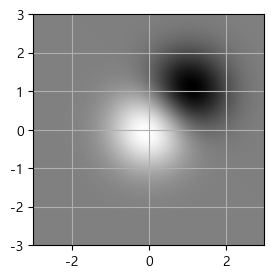

In [129]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig = plt.figure()
s = plt.scatter([1, 2, 3], [4, 5, 6])
s.set_urls(['https://www.bbc.co.uk/news', 'https://www.google.com/', None])
fig.savefig('graph/scatter.svg')

fig = plt.figure()
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
#print(Z)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.gray,
                origin='lower', extent=[-3, 3, -3, 3])

im.set_url('https://www.google.com/')
fig.savefig('graph/image.svg')

### [실습]  Scatter 그래프로 나타내기 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글, 그래프 크기 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시
plt.rcParams['figure.figsize'] = [10, 6]  

# 1.데이터 불러오기 -----------------------
file = 'data/weather_total.csv'
df = pd.read_csv(file, encoding='CP949', engine='python')

df.head()

,Unnamed: 0,일시,평균기온(°C),평균 상대습도(%),평균 전운량(1/10),합계 일조 시간(hr),강수 계속시간(hr),구분
0,0,2010-01-01,-7.6,48.0,3.8,7.3,NaN,0.0
1,1,2010-01-02,-3.6,76.4,6.0,0.8,6.57,1.0
2,2,2010-01-03,-6.8,49.3,2.6,8.2,NaN,0.0
3,3,2010-01-04,-5.9,84.1,7.5,0.1,13.03,1.0
4,4,2010-01-05,-9.9,66.4,2.1,7.5,0.95,1.0


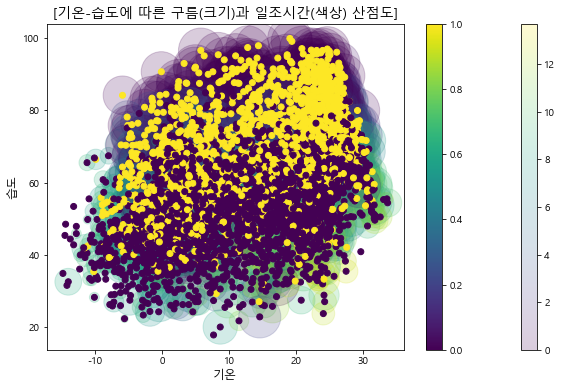

In [12]:
# 컬럼명 변경
df.columns = ['순서', '일시', '기온', '습도', '구름량',
       '일조시간', '강수시간', '구분']


# 2. 특정기간 데이터 추출하기 --------------
# df = df.query(" 일시.str.contains('2011') ")


# 3. 그래프 그리기  -----------------------
plt.scatter(df['기온'], # X좌표
            df['습도'], # Y좌표
            alpha=0.2, # 투명도 
            s=200*df['구름량'], # marker size
            c=df['일조시간'],   # marker color
            cmap='viridis' ) 
plt.xlabel('기온', fontsize=12)
plt.ylabel('습도', fontsize=12)
plt.colorbar()


# # 4.비가 온 날 그래프에 함께 표시하기 ------
# df2 = df.query(" 일시.str.contains('2011') and 구분 == 1.0 ")

plt.scatter(df['기온'], # X좌표
            df['습도'], # Y좌표
            c=df['구분'])  # marker color       
# plt.xlabel('기온', fontsize=12)
# plt.ylabel('습도', fontsize=12)
plt.colorbar()

plt.title("[기온-습도에 따른 구름(크기)과 일조시간(색상) 산점도]", fontsize=14)
plt.show()

-------

### 막대(bar) 그래프 나타내기

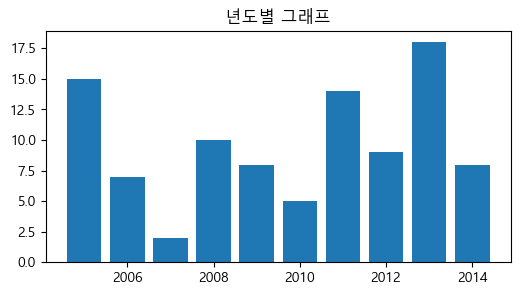

In [139]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3)  # (가로,세로) 인치 단위

# X축, Y축 데이터
X = list(range(2005,2015,1))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.bar(X, Y)     # 막대 그래프
plt.grid(False)
plt.title('년도별 그래프')
plt.show()

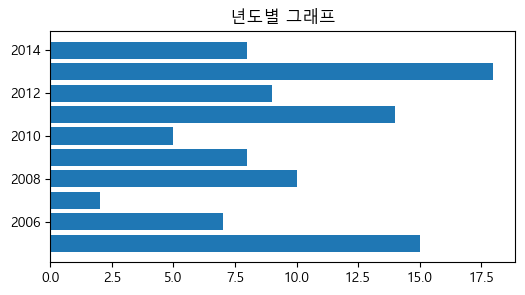

In [140]:
plt.barh(X, Y)     # 막대 그래프
plt.grid(False)
plt.title('년도별 그래프')
plt.show()

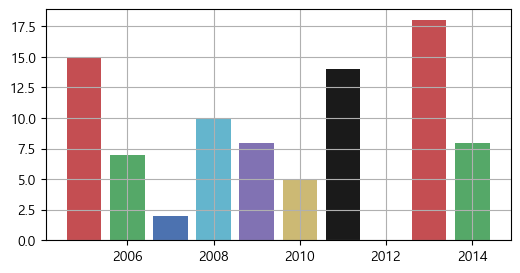

In [141]:
#그래프 색상 지정
colors = ['r','g','b','c','m','y','k','w']  # 기본색상  # Hexa코드 or CSS컬러사용
plt.bar(X, Y,color=colors)
plt.show()

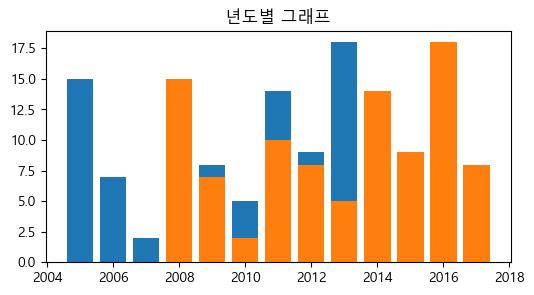

In [146]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3)  # (가로,세로) 인치 단위

# X축, Y축 데이터
X1 = list(range(2005,2015,1))
X2 = [x+3 for x in X1]
Y = [15,7,2,10,8,5,14,9,18,8]

plt.bar(X1, Y)     # 막대 그래프
plt.bar(X2, Y)     # 막대 그래프
plt.title('년도별 그래프')
plt.grid(False)
plt.show()

### 2개 막대 그래프

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[0 1 2 3 4 5 6 7 8 9]


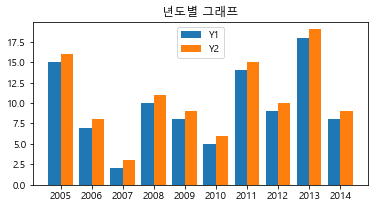

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3)  

# X축, Y축 데이터
X = list(range(2005,2015,1))
Y1= [15,7,2,10,8,5,14,9,18,8]
Y2= [y+1 for y in Y1]
lable = X
X = np.arange(len(X))

plt.bar(X-0.2, Y1, width=0.4, label='Y1')     # 막대 그래프
plt.bar(X+0.2, Y2, width=0.4, label='Y2')     # 막대 그래프
plt.xticks(X, lable)

plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.show()

### 혼합 그래프(막대 + 선)

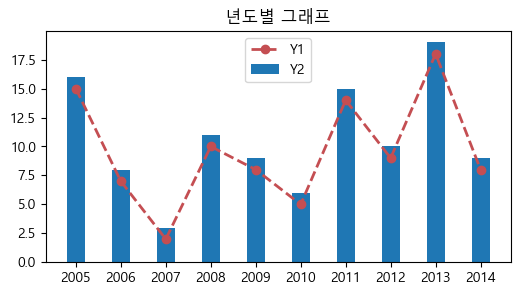

In [148]:
# X축, Y축 데이터
X = list(range(2005,2015,1))
Y1= [15,7,2,10,8,5,14,9,18,8]
Y2= [y+1 for y in Y1]

plt.plot(X, Y1, 'o', linestyle='dashed', c='r', label='Y1') # 선 그래프
plt.bar(X, Y2, width=0.4, label='Y2')     # 막대 그래프
plt.xticks(X, lable)

plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.show()

### [실습] 막대 그래프 표현하기

In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 한글출력 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = [8, 4] # setting figure siz


# 1.데이터 불러오기 -----------------------
file = 'data/weather_total.csv'
df = pd.read_csv(file, encoding='CP949', engine='python')

# 컬럼명 변경
df.columns = ['순서', '일시', '기온', '습도', '구름량',
       '일조시간', '강수시간', '구분']

# 2. 년도 컬럼 추가
tmp = pd.to_datetime(df['일시'])
df['년도'] = tmp.dt.year

# 3. 년도별 평균 구하기
df2 = df.groupby(['년도'], as_index=False).mean()
df2
# df['일조시간'].groupby(df['년도']).mean()

,년도,순서,기온,습도,구름량,일조시간,강수시간,구분
0,2010,182.0,12.140822,62.982740,5.206575,5.083014,5.474294,0.446575
1,2011,182.0,12.082192,59.536712,5.026849,5.697253,6.618699,0.400000
2,2012,182.5,12.268579,56.703279,4.827049,6.575410,5.743517,0.396175
3,2013,182.0,12.563562,60.060000,4.868219,6.626575,5.202387,0.424658
4,2014,182.0,13.400274,62.885753,4.656164,6.663836,5.141269,0.367123
5,2015,182.0,13.621918,59.837260,4.645479,7.069315,6.124531,0.350685
6,2016,182.5,13.592896,59.147268,4.848907,6.824590,4.861268,0.387978
7,2017,182.0,13.073151,57.728493,4.585205,7.239722,5.087639,0.394521
8,2018,182.0,13.002466,57.474521,4.748767,7.148753,6.731641,0.350685
9,2019,182.0,13.598904,56.806301,4.899178,NaN,5.653597,0.380822


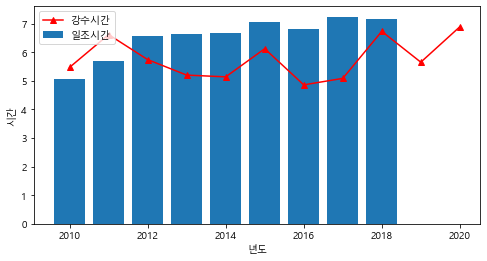

In [4]:
# 4. 년도별 일조시간, 강수시간
X  = df2['년도']
Y1 = df2['일조시간']
Y2 = df2['강수시간']

# 5. 막대 그래프 그리기
plt.bar(X, Y1, label='일조시간')
plt.plot(X, Y2, 'r^', linestyle='solid', label='강수시간')
plt.xlabel('년도')
plt.ylabel('시간')
plt.legend()
plt.show()

In [ ]:
# 4. 년도별 일조시간, 강수시간
X = df2['년도']
Y = df2['구름량']


plt.bar(X, Y1, label='일조시간')
plt.plot(X, Y2, 'r^', linestyle='solid', label='강수시간')
plt.xlabel('년도')
plt.ylabel('시간')
plt.legend()
plt.show()

--------

-------

## 원(Pie) 그래프
- 범주형 데이터들이 가지는 전체적인 비율을 한눈에 보고자 할 때 사용

c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0,

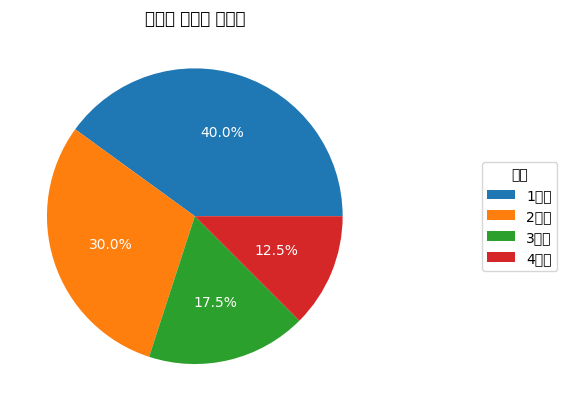

In [20]:
import matplotlib.pyplot as plt 
import pandas as pd

idx = ['1학년','2학년','3학년','4학년']
val = [16,12,7,5]
per = [val[x]/sum(val) *100 for x in range(len(val))]

plt.pie(per, autopct='%1.1f%%', textprops=dict(color="w"))

plt.title("학년별 동아리 회원수")
plt.legend(idx, title='학년', loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


#### - Data:  X축, Y축 데이터 (년도별 3.0이상 강진 횟수)

In [150]:
x = list(range(2005,2015,1))
y  = [15,7,2,10,8,5,14,9,18,8]

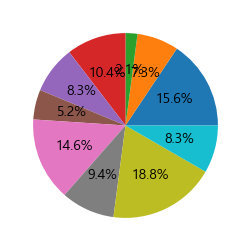

In [151]:
plt.pie(y, autopct='%.1f%%')
plt.show()

#### - 레이블 보여주기

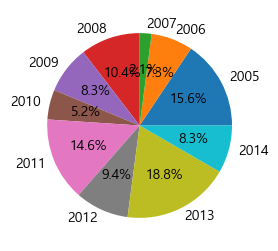

In [152]:
plt.pie(y, labels=x, autopct='%.1f%%')
plt.show()

#### - 제목과 범례 표시

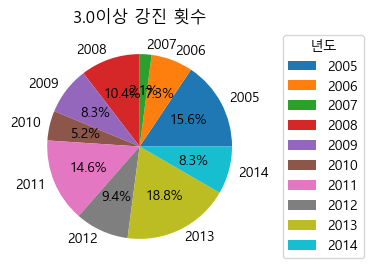

In [153]:
plt.pie(y, labels=x,  autopct='%1.1f%%')
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수")
plt.show()

#### - 글씨 크기&색상 조정
- 단, textprops 옵션 중 color를 사용하면 labels=x 이 표시되지 않는다.

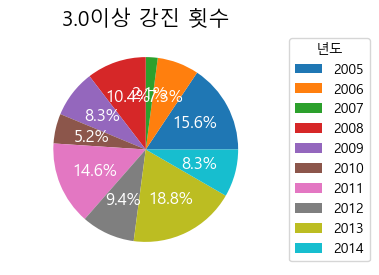

In [154]:
plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'size':12, 'color':'w'})
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수", size=15)
plt.show()

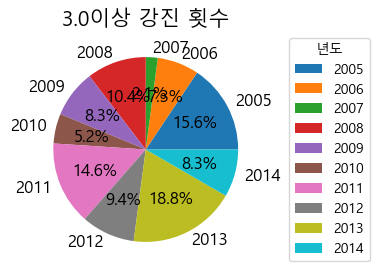

In [155]:
plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'size':12})
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수", size=15)
plt.show()

#### - 조각이 모두 분리되도록 표시

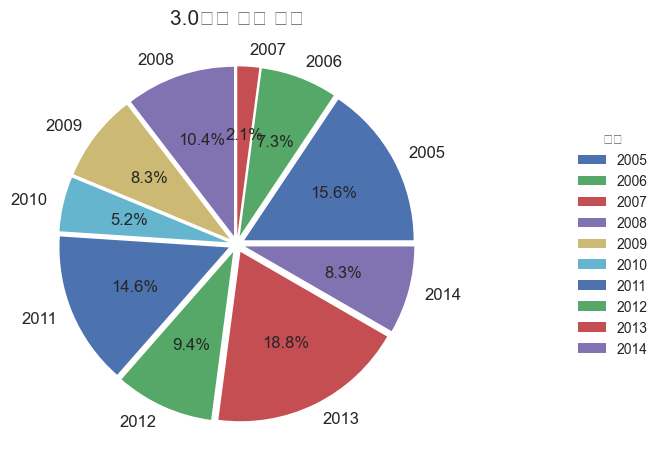

In [28]:
x = list(range(2005,2015,1))
y  = [15,7,2,10,8,5,14,9,18,8]

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05) #조각이 돌출되도록 표현


plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'size':12}, explode=explode)
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수", size=15)
plt.show()


#### - 특정 조각이 돌출되도록 표시

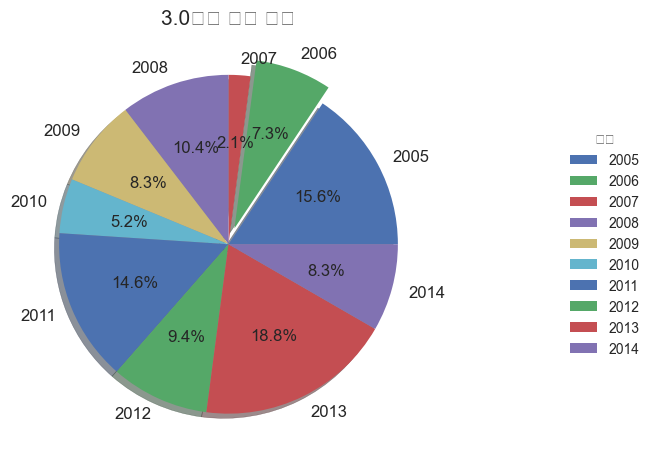

In [26]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0) #조각이 돌출되도록 표현

plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'size':12},
        explode=explode, shadow=True, startangle=0)
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수", size=15)
plt.show()

-------

## 3. subplot()을 이용한 그래프 배치

### subplot()으로 그래프 여러개 표현하기

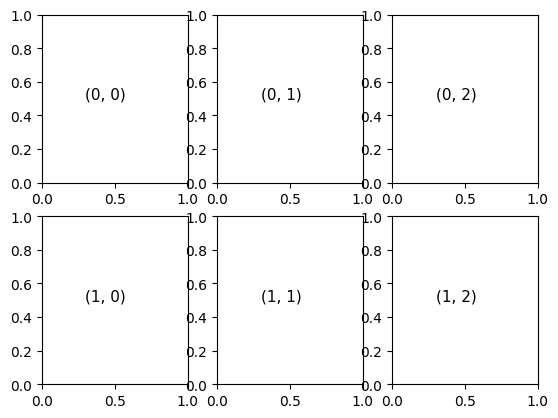

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3)

for i in range(2):      # 2행
    for j in range(3):  # 3열
        # 텍스트만 표시
        ax[i, j].text(0.3, 0.5, str((i,j)), fontsize=11)  

### 공간 병합하여 그래프 배치하기

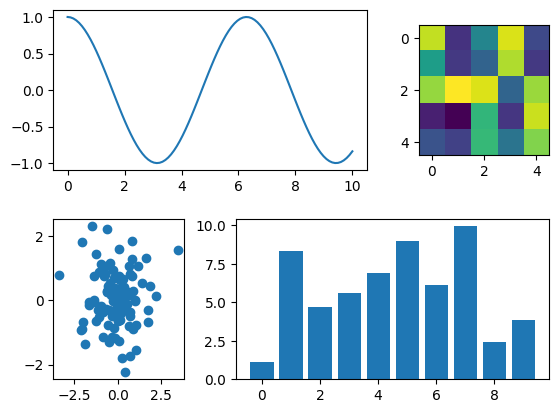

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 공간 설정
#fig, ax = plt.subplots(2,3)      # 2행 2열 그래프 공간

# 공간을 합병하기 위한 GridSpec 클래스 사용
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)


# 선 그래프
X = np.linspace(0, 10, 100)      # 0~10사이의 선형 분포 100개 
Y = np.cos(X)                    # X의 코사인 값
#ax[0,0].plot(X, Y)              # 선 그래프
plt.subplot(grid[0, :2]).plot(X, Y)               

# 분포를 2D 이미지 그림으로
Z = np.random.uniform(0,1,(5,5)) # 0~1사이의 균일분포값을 5행x5열
#ax[1,1].imshow(Z)                # 2D 이미지 그림으로 표현
plt.subplot(grid[0, 2]).imshow(Z)

# 점 그래프
X = np.random.randn(100)         # 정규 분포를 가지는 데이터
Y = np.random.randn(100)         # 정규 분포를 가지는 데이터
#ax[1,0].scatter(X, Y)
plt.subplot(grid[1, 0]).scatter(X, Y)

# 막대 그래프
X = np.arange(10)                # 0~9사이의 연속값
Y = np.random.uniform(1,10,10)   # 균일분포값 생성
#ax[0,1].bar(X, Y)                # 막대 그래프
plt.subplot(grid[1, 1:]).bar(X, Y)

plt.show()

### [실습] subplot()을 이용하여 그래프를 분리해 주세요.

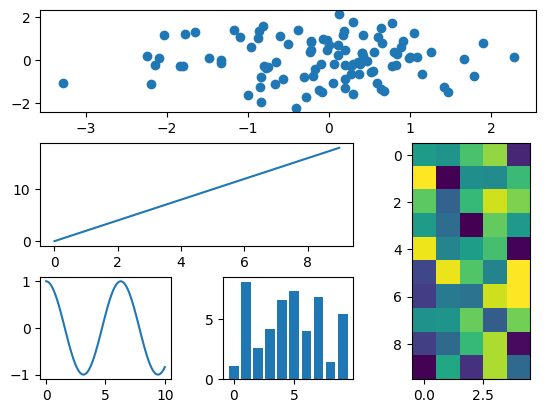

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 공간 설정
#fig, ax = plt.subplots(2,3)      # 2행 2열 그래프 공간

# 공간을 합병하기 위한 GridSpec 클래스 사용
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)


# 점 그래프
X = np.random.randn(100)         # 정규 분포를 가지는 데이터
Y = np.random.randn(100)         # 정규 분포를 가지는 데이터
#ax[1,0].scatter(X, Y)
plt.subplot(grid[0, :]).scatter(X, Y)

# 선 그래프
X = np.arange(0, 10)
Y = 2*X
plt.subplot(grid[1, :2]).plot(X, Y)

# 선 그래프
X = np.linspace(0, 10, 100)      # 0~10사이의 선형 분포 100개 
Y = np.cos(X)                    # X의 코사인 값
#ax[0,0].plot(X, Y)              # 선 그래프
plt.subplot(grid[2, 0]).plot(X, Y)               

# 막대 그래프
X = np.arange(10)                # 0~9사이의 연속값
Y = np.random.uniform(1,10,10)   # 균일분포값 생성
#ax[0,1].bar(X, Y)                # 막대 그래프
plt.subplot(grid[2, 1]).bar(X, Y)

# 분포를 2D 이미지 그림으로
Z = np.random.uniform(0,1,(10,5)) # 0~1사이의 균일분포값을 5행x5열
#ax[1,1].imshow(Z)                # 2D 이미지 그림으로 표현
plt.subplot(grid[1:, -1]).imshow(Z)

plt.show()

--------

## 3. 다양한 그래프

### 이미지 파일 matplotlib 그래프에 나타내기(imshow)

#### - matplotlib 그래프에 이미지 파일 나타내기

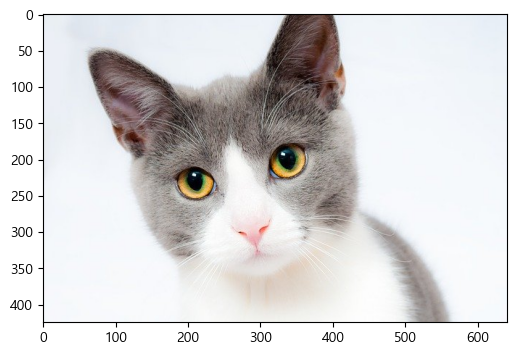

In [182]:
import matplotlib.pyplot as plt
import matplotlib.image as img

img_test = img.imread('image/cat.jpg')
plt.imshow(img_test) 
plt.grid(False)
plt.show()

#### - OpenCV로 이미지 파일을 읽어와 matplotlib 그래프에 나타내기

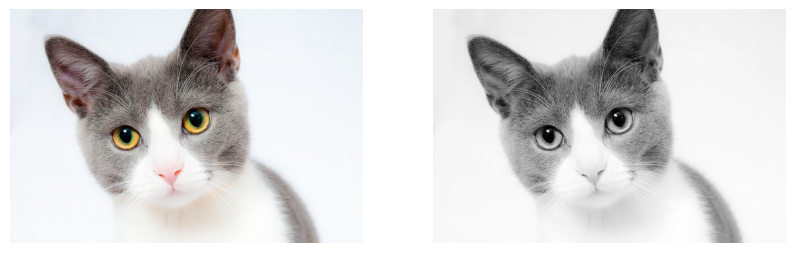

In [180]:
import cv2
import matplotlib.pyplot as plt

# 컬러 영상 & 그레이스케일 영상 불러오기
img1 = cv2.imread('image/cat.jpg', cv2.IMREAD_COLOR) 
img2 = cv2.imread('image/cat.jpg', cv2.IMREAD_GRAYSCALE)

# matplotlib출력을 위해 RGB 순서로 변환
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 

# 두 개의 영상을 함께 출력
plt.figure(figsize=(10, 5)) #그래프 크기(인치)
plt.subplot(121), plt.axis('off'), plt.imshow(img1_rgb)
plt.subplot(122), plt.axis('off'), plt.imshow(img2, cmap='gray')
plt.show()

### 히스토그램 그래프
- 주어진 자료를 몇 개의 구간으로 나누고 각 구간의 도수(frequency)를 조사하여 나타낸 막대 그래프

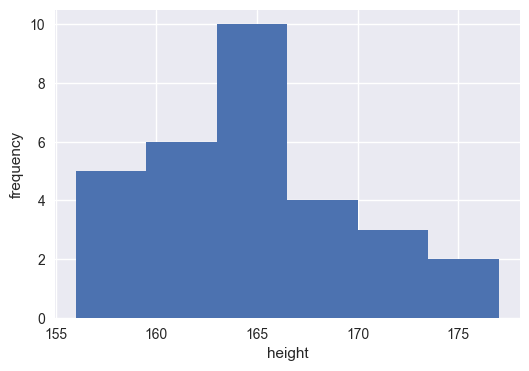

In [38]:
plt.figure(figsize=(6,4))
heights = np.array([175,165,164,164,171,165,160,169,164,159,
                    163,167,163,172,159,160,156,162,166,162,
                    158,167,160,161,156,172,168,165,165,177])
plt.hist(heights, bins=6)  # 히스토그램 구간
plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

#### - 누적 히스토그램 그리기

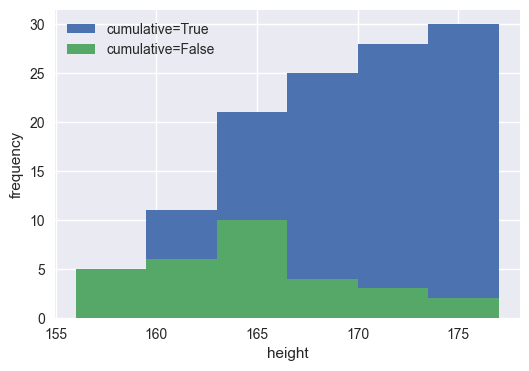

In [40]:
plt.figure(figsize=(6,4))
plt.hist(heights, bins=6, label='cumulative=True', cumulative=True) 
plt.hist(heights, bins=6, label='cumulative=False', cumulative=False) 
plt.xlabel('height')
plt.ylabel('frequency')
plt.legend(loc='upper left')
plt.show()

#### - 히스토그램을 이용한 정규 분포 함수와 확률 밀도 함수 그리기

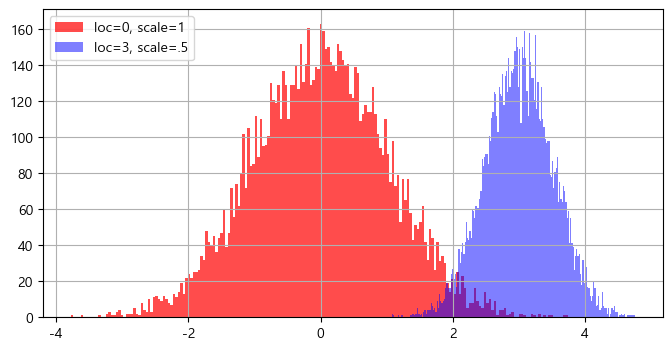

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# 표준 정규분포 (평균0, 분산1)
f1 = np.random.normal(loc=0, scale=1, size=10000)   # (평균 0, 분산 1)
f2 = np.random.normal(loc=3, scale=.51, size=10000) # (평균 3, 분산 0.5)

plt.hist(f1, bins=200, color='red', alpha=.7, label='loc=0, scale=1')
plt.hist(f2, bins=200, color='blue', alpha=.5, label='loc=3, scale=.5')

plt.legend()
plt.show()


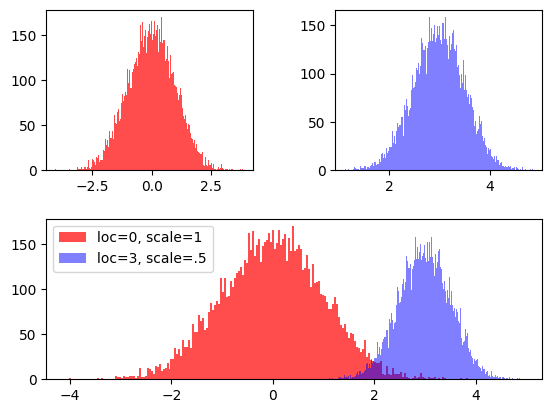

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# 표준 정규분포 (평균0, 분산1)
f1 = np.random.normal(loc=0, scale=1, size=10000)   # (평균 0, 분산 1)
f2 = np.random.normal(loc=3, scale=.51, size=10000) # (평균 3, 분산 0.5)


# 공간을 합병하기 위한 GridSpec 클래스 사용
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

# red 히스토그램
plt.subplot(grid[0, 0]).hist(f1, bins=200, color='red', alpha=.7)


# blue 히스토그램
plt.subplot(grid[0, 1]).hist(f2, bins=200, color='blue', alpha=.5)

# all 히스토그램
plt.subplot(grid[1, :]).hist(f1, bins=200, color='red', alpha=.7, label='loc=0, scale=1')
plt.subplot(grid[1, :]).hist(f2, bins=200, color='blue', alpha=.5, label='loc=3, scale=.5')
plt.legend()
plt.show()

#### - scipy.stats를 이용하여 확률 밀도 함수 그리기
- 확률 밀도 함수 : 연속적으로 나타나는 변수의 분포인 연속 확률 분포를 표현한 함수
- 예: 학생들의 키를 확률변수 X라고 할때 키 값의 분포는 연속적이며, 이 분포를 Y축에 나타내어 그릴 경우 종 모양의 확률 밀도 함수 형태가 된다.

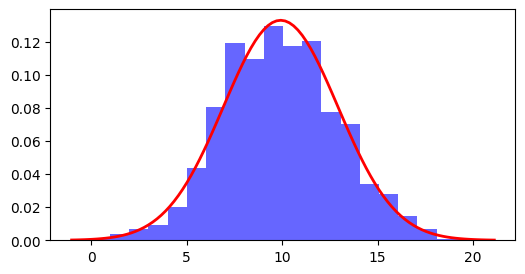

In [63]:
from scipy.stats import norm

plt.figure(figsize=(6,3))

# 평균이 10, 분산이 3인 1000개 데이터 생성
data = norm.rvs(10, 3, size=1000)
plt.hist(data, bins=20, density=True, alpha=0.6, color='b')

# 정규 분포를 데이터에 피팅함
mu, std = norm.fit(data)

# scipy pdf는 평균, 표준편차로부터 확률 밀도 함수를 생성함
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)   # 확률
plt.plot(x, p, 'r', linewidth=2)
plt.show()

### 히트맵(Heapmap)
- 데이터 값이 클 경우 작을 경우에 대해어 서로 다른 색상을 사용하여 데이터 분포를 쉽게 이해할 수 있도록 함

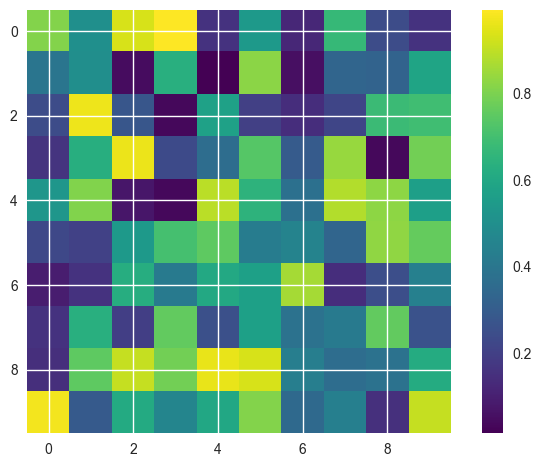

In [34]:
import numpy as np

data = np.random.random((10, 10))  # 10x10 행렬
# plt.imshow(data)
# plt.imshow(data, cmap='cool')
# plt.imshow(data, cmap='Greys')
plt.imshow(data, cmap='viridis')
plt.colorbar()

plt.show()

### 상자 차트(Boxplot) 그래프

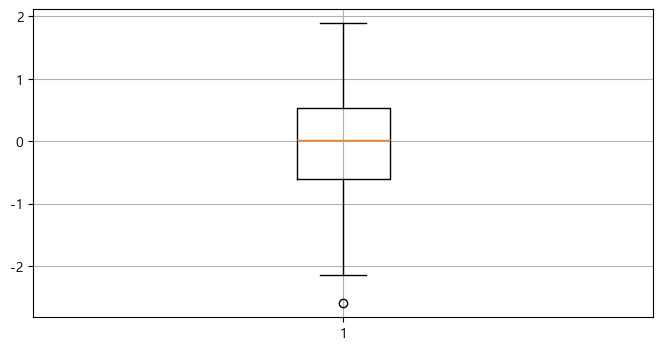

In [188]:
import matplotlib.pyplot as plt
import numpy as np

# 정규분포를 따르는 난수 100개 생성
data = np.random.randn(100)

# 상자 그래프
plt.boxplot(data)

plt.show()

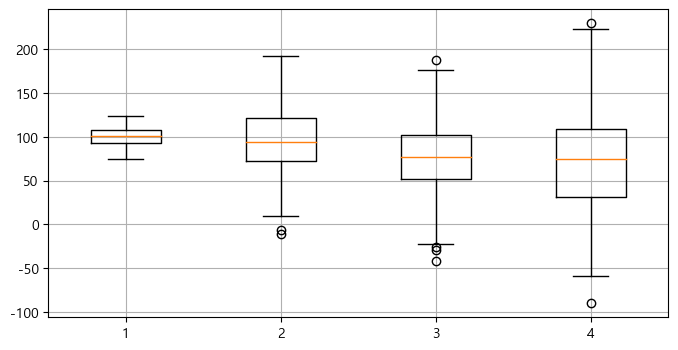

In [190]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# # 표준 정규분포 (평균0, 분산1) 따르는 난수 200개 씩 생성
data1 = np.random.normal(100, 10, 200)  # 평균 100, 분산 10
data2 = np.random.normal(100, 40, 200)  # 평균 100, 분산 40
data3 = np.random.normal(80, 40, 200)   # 평균 80, 분산 40
data4 = np.random.normal(80, 60, 200)   # 평균 80, 분산 60

# 상자 그래프
plt.boxplot( [data1, data2, data3, data4] )

plt.show()

----------

끝!